In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


1. Загрузите файл HR.csv в pandas dataframe

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Netology/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [7]:
stat = df.describe()
stat.loc['mode'] = df.mode().iloc[0]
stat.loc['median'] = df.median() # то же самое что и 50%%

print(stat)

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   
mode              0.100000         0.550000        4.000000   
median            0.640000         0.720000        4.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719

<ipython-input-7-bd10c966376c>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stat.loc['median'] = df.median()


3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

<ipython-input-8-6f8db703da45>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


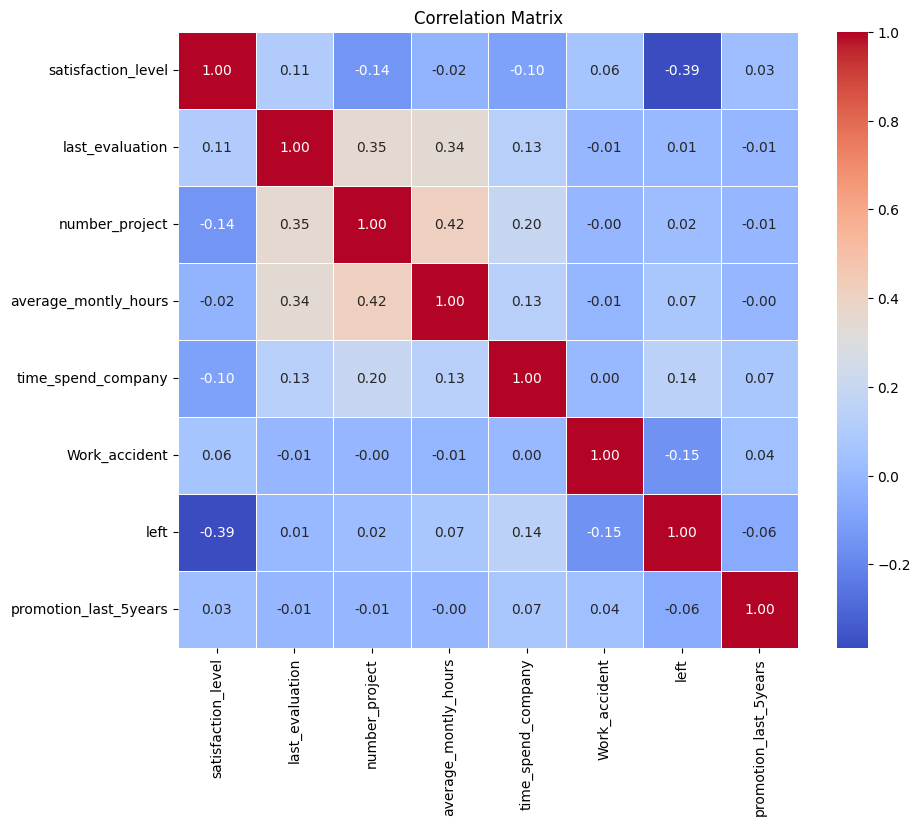

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
flat_corr = correlation_matrix.abs().unstack()
flat_corr = flat_corr[flat_corr.index.get_level_values(0) != flat_corr.index.get_level_values(1)]

max_corr = flat_corr.idxmax()
max_corr_value = flat_corr.max()

min_corr = flat_corr.idxmin()
min_corr_value = flat_corr.min()

print(f"Две наиболее скоррелированные переменные: {max_corr[0]} и {max_corr[1]} (коэфкорр: {max_corr_value:.2f})")
print(f"Две наименее скоррелированные переменные: {min_corr[0]} и {min_corr[1]} (коэфкорр: {min_corr_value:.2f})")


Две наиболее скоррелированные переменные: number_project и average_montly_hours (коэфкорр: 0.42)
Две наименее скоррелированные переменные: time_spend_company и Work_accident (коэфкорр: 0.00)


4. Рассчитайте сколько сотрудников работает в каждом
департаменте

In [16]:
employee_count_by_department = df['department'].value_counts()
employee_count_by_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

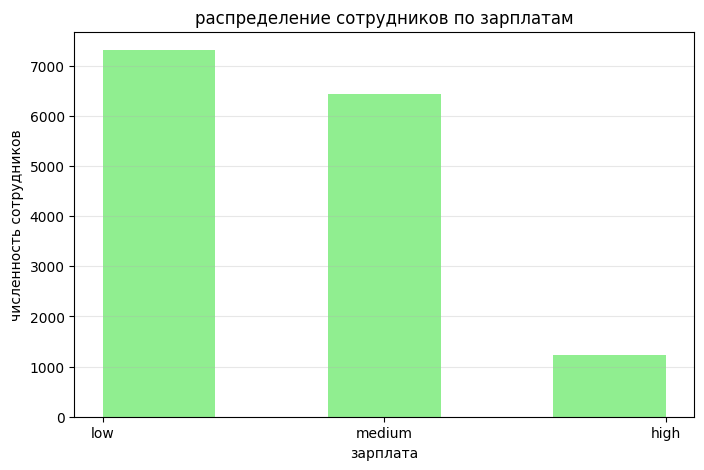

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(df['salary'], bins=5, color='lightgreen')
plt.title('распределение сотрудников по зарплатам')
plt.xlabel('зарплата')
plt.ylabel('численность сотрудников')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

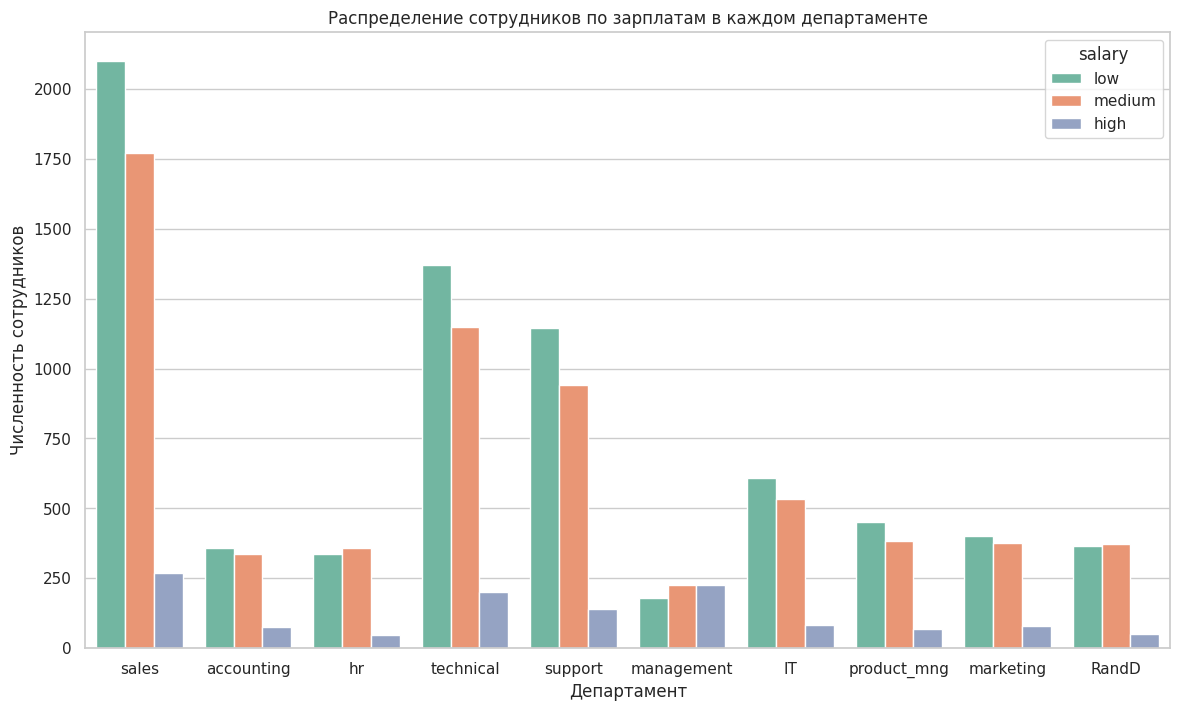

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.countplot(x='department', hue='salary', data=df, palette='Set2', order=df['department'].unique())
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Численность сотрудников')
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [43]:
from scipy.stats import ttest_ind

high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

t_statistic, p_value = ttest_ind(high_salary, low_salary, equal_var=False)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Гипотеза H0 отвергается: сотрудники с высоким окладом проводят на работе больше времени чем сотрудники с низким окладом.')
else:
    print('Гипотеза H0 не отвергается, Ha не принимается: нет статистически значимых различий во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.')

# p=44.6% > 5% нет достаточных статистических доказательств для отвержения нулевой гипотезы
# (H0: нет различий во времени, проведенном на работе, между сотрудниками с высоким и низким окладом).
# t-тест: нет оснований утверждать, что сотрудники с высоким окладом проводят на работе больше времени,
# чем сотрудники с низким окладом

T-statistic: -0.7624331665385475
P-value: 0.4459045542257889
Гипотеза H0 не отвергается, Ha не принимается: нет статистически значимых различий во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.


8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [50]:
group_by_left = df.groupby('left')

promotion_ratio = group_by_left['promotion_last_5years'].mean()
satisfaction_mean = group_by_left['satisfaction_level'].mean()
projects_mean = group_by_left['number_project'].mean()

print("Доля сотрудников с повышением за последние 5 лет:")
print(promotion_ratio)
# промоушн в 5 раз повышает шансы что человек останется

print("\nСредняя степень удовлетворенности:")
print(satisfaction_mean)
# у тех кто остался степень удовлетворенности в 1.5 раза выше чем у тех кто уволился

print("\nСреднее количество проектов:")
print(projects_mean)
# примерно одиннаковое количество проектов ~4 в обоих группах,
# на больших числах у тех кто остался было на 2% меньше проектов

Доля сотрудников с повышением за последние 5 лет:
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

Средняя степень удовлетворенности:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(['department', 'salary', 'left'], axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Точность модели: {accuracy:.2f}")
print("\nМатрица ошибок:") # 2094 + 166 / 2094 + 166 + 200 + 540 = 0.75
print(conf_matrix)
print("\nОтчет о классификации:")
print(class_report)

# модель точнее работает с оставшимися в компании 0.79>0.45
# доля правильных предсказаний для оставшихся выше: 0.91>0.24
# f1-score = precision + recall: выше для оставшихся: 0.85>0.31
# support = количество 0 (оставшихся) и 1 (уволенных)

# предсказ модель хорошо работает с классом оставшихся

Точность модели: 0.75

Матрица ошибок:
[[2094  200]
 [ 540  166]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

